<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b> 
Métodos Numéricos
</b> </ins> </center> </h1>
    
<h3 style="color:Blue;"> <center> <b> 
Método da Bisseção Usando Scipy
</b></center> </h3>
    
</div>

Nossa aula de hoje tem como objetivo principal mostrar como usar as funções existentes na biblioteca `Scipy` para calcular a raiz de uma equação não linear pelo método da bisseção.

A busca por raízes que solucionem equações não lineares é implementada na biblioteca scipy no submódulo `optimize`, cujas funções são mostradas na [documentação](https://docs.scipy.org/doc/scipy/reference/optimize.html).

Vamos chamar todas as bibliotecas que precisamos.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

O módulo `optimize` provê funções para minimização (ou maximização) de funções objetivo, possivelmente sujeitas à restrições. Ele inclui solucionadores de problemas não lineares (com suporte à algoritmos de otimização global e local), programação linear, mínimos quadrados não lineares e restritos, busca de raiz e ajuste de curva.

Para a solução de equações não lineares (busca de raiz), nosso objetivo aqui, o módulo apresenta diversas funções:

* __brentq__: encontra a raiz de uma equação usando o método de Brent;
* __brenth__: encontra a raiz de uma equação usando o método de Brent com
extrapolação hiperbólica;
* __ridder__: encontra a raiz de uma equação usando o método de Ridder;
* __bisect__: encontra a raiz de uma equação usando o método da Bisseção (o estudado nessa aula);
* __newton__: encontra a raiz de uma equação usando o método de Newton, da secante ou Halley, dependendo dos parâmetros (próximas sessões) ;
* __tom748__: encontra a raiz de uma equação usando o método do algoritmo TOMS 748;
* __fixed_point__: encontra o ponto fixo de uma função (trabalharemos logo em seguida).

Além dessas funções, que implementam alguns dos métodos que consideraremos
nesse curso, a partir a versão 1.2.1 da biblioteca scipy trouxe, como uma das principais modificações para esse módulo, a implementação da função `root_scalar`, cujo objetivo é encontrar a raiz de uma equação não linear. A diferença dela para as demais funções listadas acima é que ela funciona como uma interface unificada para todos esses métodos
(exceto `fixed_point`) em uma função só, isto é, podemos usar a função `root_scalar` para encontrar a raiz de uma função com qualquer dos métodos disponíveis, simplesmente, para tal, escolhando os parâmetros certos. __Essa será nossa abordagem!

Para o método da bisseção, a função `root_scalar` possui três argumentos
obrigatórios (não _default_, que precisam ser atribuídos pelo usuário): 

* `f`, que define a função da equação que será avaliada, 
* `method`, que define o tipo do método usado pela função (no nosso caso `’bisect’`), e 
* `bracket`, que recebe uma lista com dois valores, referentes aos limites $a$ e $b$ do intervalo $[a, b]$ no qual a equação será avaliada.

Usaremos como exemplo, pra verificar a usabilidade da função `root_scalar`, o
mesmo exemplo estudado na aula anterior, baseado na função

$$
e^x = x+2~~~~~~~~\Rightarrow~~~~~~~~ f(x) = e^x - x-2 = 0
$$

avaliando as raízes no intervalo $[0,2]$.

In [8]:
f = lambda x: np.exp(x) - x - 2
f1 = lambda x: np.exp(x)
f2 = lambda x: x + 2

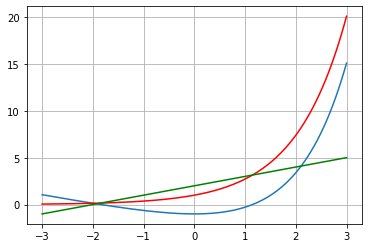

In [15]:
x = np.linspace(-3,3,200)
plt.plot(x,f(x))
plt.plot(x,f1(x),color='r')
plt.plot(x,f2(x),color='g')
plt.plot()
plt.grid()

E para encontrar a raiz, basta usar

In [16]:
raiz = opt.root_scalar(f,method= 'bisect',bracket=[0,2])
raiz

      converged: True
           flag: 'converged'
 function_calls: 42
     iterations: 40
           root: 1.1461932206202619

Notemos que a saída mostra um conjunto de informações, agrupado em um objeto
chamado de `RootResults`, descrito pela sua [documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.RootResults.html). Esse objeto possui como atributos mais importantes

* __root__: valor da raiz encontrada;
* __iterations__: número de iterações para encontrar a raiz;
* __function_calls__: número de vezes que a função foi chamada durante os cálculos;
* __converged__: indica se o método de fato convergiu e encontrou a raiz;
* __flag__: causa da parada do algoritmo.

Dessa forma, o que vemos na saída é que o método convergiu e encontrou a raiz, de valor $1.1461932206202619$, após 40 iterações, durante as quais a função foi chamada 42 vezes.

Nós também podemos acessar os valores de cada atributo desse individualmente, bastanto, para isso, referenciar o atributo como um objeto.

Dessa forma, para saber somente o resultado da raiz, basta fazer

In [17]:
raiz.root

1.1461932206202619

e, para saber o número de iterações, basta fazer

In [18]:
raiz.iterations

40

seguindo esse procedimento para qualquer um dos possíveis atributos do objeto
`RootResults`.

Podemos ainda aplicar esse mesmo procedimento diretamente na função,

In [19]:
opt.root_scalar(f, method= 'bisect', bracket=[0,2]).root

1.1461932206202619

obtendo, obviamente, o mesmo resultado.

Com relação ao critério de parada relacionado ao erro, existem dois parâmetros na função `root_scalar` para a definição da tolerância:

* `xtol`, que define a tolerância absoluta e 
* `rtol`, que define a tolerância relativa como critério
de parada. 

Vamos testar os dois, considerando o mesmo valor de $10^{-1}$ como exemplo.



In [23]:
opt.root_scalar(f, method= 'bisect', 
                bracket=[-2,0], 
                xtol=1e-1)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 5
           root: -1.8125

In [24]:
opt.root_scalar(f, method= 'bisect', 
                bracket=[-2,0], 
                rtol=1e-1)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 4
           root: -1.875

Notemos que as duas raízes são diferentes e, ainda mais, quando adotamos como
critério `rtol`, a convergência acontece com uma iteração a menos do que quando usamos `xtol`. Porque isso acontece?

Se a escolha for `xtol`, a função testa, como critério de parada, se o erro absoluto é menor que o valor do parâmetro, isto é, se

$$
\varepsilon_a = \left|x_{i+1} - x_i\right| = \dfrac{b_i - a_i}{2} \leqslant xtol
$$

ao passo que, se a escolha for `rtol`, a função testa se o erro relativo é menor que o valor do parâmetro, isto é, se

$$
\varepsilon_r = \left|\dfrac{x_{i+1} - x_i}{x_{i+1}}\right| \leqslant rtol
$$

A escolha de que parâmetro escolher como critério de parada relativo ao erro fica, literalmente, a gosto do "freguês" .

Mas o que acontece se usarmos os dois, com mesmo valor, no mesmo cálculo?

In [25]:
opt.root_scalar(f, method= 'bisect', bracket=[-2,0], xtol=1e-1, rtol=1e-1)

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 3
           root: -1.75

Opa... um resultado bem diferente... Deixo a critério do aluno interpretar esse resultado.

Outro critério que pode ser adotado é com relação ao número de iterações desejada. Esse critério pode ser ajustado pelo parâmetro `maxiter`, que define o número máximo de iterações como critério de parada do algoritmo.

É interessante notar que, como esperado, a função irá parar de iterar assim que um dois dois critérios for atingido, não necessitando que os dois sejam satisfeitos. Vejamos um exemplo

In [26]:
opt.root_scalar(f, method= 'bisect', bracket=[-2,0], xtol=1e-10, maxiter=100)

      converged: True
           flag: 'converged'
 function_calls: 37
     iterations: 35
           root: -1.8414056604378857

Como vemos, com uma tolerância de $10^{−10}$ , e um número máximo de 100 iterações, nossa saída mostra uma convergência com apenas 35 iterações. Dessa forma, podemos afirmar que a parada se deu porque o critério da tolerância foi atingido antes do critério do número máximo de iterações.

Vamos agora repetir o teste, porém colocando um número máximo de 30 iterações.

In [27]:
opt.root_scalar(f, method= 'bisect', bracket=[-2,0], xtol=1e-10, maxiter=30)

      converged: False
           flag: 'convergence error'
 function_calls: 32
     iterations: 30
           root: -1.8414056617766619

Vemos aqui que o algoritmo não converge, como mostram, na saída, `converged` e `flag`, justamente pelo erro ainda ser maior que o mínimo tolerável, uma vez que o critério do número de iterações foi atingido antes e, dessa forma, as iterações foram interrompidas precocemente.